# Laboratorio 5

## Task 1

1. Defina y explique qué “expected sarsa”  
a. ¿Cómo se diferencia de “sarsa”?  
b. ¿Para qué sirven las modificaciones que se hacen sobre  “sarsa”?  
2. Defina y explique qué es “n-step TD”  
a. ¿Cómo se diferencia de TD(0)?  
b. ¿Cuál es la utilidad de esta modificación?  
c. ¿Qué usa como objetivo?  
3. ¿Cuál es la diferencia entre SARSA y Q-learning?  

## Task 2

### 1 y 2

In [1]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import time

### 3. Inicializar entorno

In [2]:
env = gym.make('CliffWalking-v0')
learning_rate = 0.1
discount = 0.9
epsilon = 0.1
n_episodes = 1000
max_steps = 100

### 4. SARSA

In [3]:
def choose_action(Q, state):
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state, :])
	return action

In [4]:
def learn(Q, state, state2, reward, action, action2):
	predict = Q[state, action]
	target = reward + discount * Q[state2, action2]
	Q[state, action] = Q[state, action] + learning_rate * (target - predict)

In [5]:
def SARSA():
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = 0
    episode_rewards = []
    for _ in range(n_episodes):
        t = 0
        state, info = env.reset()
        done = False
        action = choose_action(Q, state)
        total_rewards = 0
        while not done and t < max_steps:
            env.render()
            state2, reward, done, _, info = env.step(choose_action(Q, state))
            action2 = choose_action(Q, state2)
            learn(Q, state, state2, reward, action, action2)
            state = state2
            action = action2
            rewards += reward
            total_rewards += reward
        episode_rewards.append(total_rewards)

    return episode_rewards

### 5. Q-learning

In [6]:
def q_learn(Q, state, state2, reward, action):
    predict = Q[state, action]
    target = reward + discount * np.max(Q[state2, :])
    Q[state, action] = Q[state, action] + learning_rate * (target - predict)

In [7]:
def q_learning():
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = 0
    episode_rewards = []

    for _ in range(n_episodes):
        t = 0
        state, info = env.reset()
        done = False
        total_rewards = 0
        while not done and t < max_steps:
            env.render()
            action = choose_action(Q, state)
            state2, reward, done, _, info = env.step(action)
            q_learn(Q, state, state2, reward, action)
            state = state2
            rewards += reward
            total_rewards += reward
        episode_rewards.append(total_rewards)

    return episode_rewards

In [8]:
episode_rewards_sarsa = SARSA()
episode_rewards_q_learning = q_learning()

C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gymnasium\envs\toy_text\cliffwalking.py:196: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CliffWalking-v0", render_mode="rgb_array")
  gym.logger.warn(


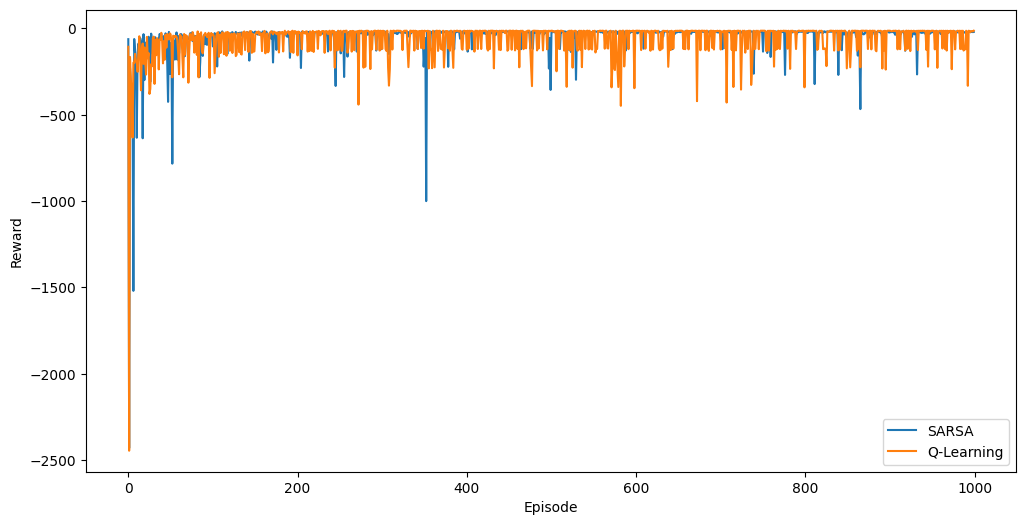

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(episode_rewards_sarsa, label='SARSA')
plt.plot(episode_rewards_q_learning, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

### 8. Análisis de resultados

a. Observe los resultados graficados y compare el rendimiento de SARSA y Q-Learning a lo largo de
los episodios.  

b. Considere cómo cada algoritmo equilibra la exploración y la explotación.

### 9. Preguntas

a. P1: ¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?  

b. P2: ¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en
comparación con SARSA?  

c. P3: ¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparación
con la naturaleza "off-policy" de Q-Learning?  

d. P4: Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el
camino más seguro? ¿Por qué?  

e. P5: ¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada
algoritmo?  